# Content List

## 1. Import Libraries

## 2. Import Data

## 3. Clean Data
### 3.1 Missing Values
### 3.2 Duplicates Check
### 3.3 Extreme Values Check

## 4. Regression Analysis: GDP vs. E-commerce Activities
### 4.1 Data Prep for Regression Analysis
### 4.2 Regression Analysis

## 5. Relationship Exploration

## 6. Regression Analysis: GDP vs. Travel and Accommodation Services
### 6.1 Data Prep for Regression Analysis
### 6.2 Regression Analysis

## 7. Regression Analysis: GDP vs.Daily Frequency Internet Access
### 7.1 Data Prep for Regression Analysis
### 7.2 Regression Analysis

## 8. Conclusions


# 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Import Data

In [4]:
# Create path to project folder
path = r'C:\Users\adrig\OneDrive\Documentos\CAREERFOUNDRY\DATA IMMERSION\ACHIEVEMENT 6\Internet use in EU'
path

'C:\\Users\\adrig\\OneDrive\\Documentos\\CAREERFOUNDRY\\DATA IMMERSION\\ACHIEVEMENT 6\\Internet use in EU'

In [5]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'internet_use_act_pp_gdp_act_group_flag.csv'), index_col=0)

In [6]:
df.head()

,freq_internet_access,demographic_group,country,year,internet_access_rate,internet_activities,internet_activities_rate,purchasing_power_gdp,activity_group
0,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,Internet banking,66.65,40200.0,E-commerce and Services
1,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,civic or political participation,21.21,40200.0,Civic
2,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,sending/receiving e-mails,72.86,40200.0,Personal Communication
3,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,finding information about goods and services,66.88,40200.0,Information and Research
4,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,job search or sending an application,14.11,40200.0,Work and Professional Use


# 3. Data Cleaning

In [7]:
df.columns

Index(['freq_internet_access', 'demographic_group', 'country', 'year',
       'internet_access_rate', 'internet_activities',
       'internet_activities_rate', 'purchasing_power_gdp', 'activity_group'],
      dtype='object')

In [8]:
df.shape

(1006934, 9)

## 3.1 Missing Values

In [9]:
# Check for missing values
df.isnull().sum()

freq_internet_access           0
demographic_group              0
country                        0
year                           0
internet_access_rate           0
internet_activities          157
internet_activities_rate     157
purchasing_power_gdp        5985
activity_group                 0
dtype: int64

In [10]:
# Check for missing values
df[df['internet_activities'].isnull()]

,freq_internet_access,demographic_group,country,year,internet_access_rate,internet_activities,internet_activities_rate,purchasing_power_gdp,activity_group
22942,daily,Females with low formal education,Italy,2004,5.55,NaN,NaN,24200.0,Other
30694,daily,Females with medium formal education,Italy,2004,32.46,NaN,NaN,24200.0,Other
38511,daily,Females with high formal education,Italy,2004,52.10,NaN,NaN,24200.0,Other
46383,daily,"Females, 16 to 24 years old",Italy,2003,10.70,NaN,NaN,24000.0,Other
46384,daily,"Females, 16 to 24 years old",Italy,2004,40.20,NaN,NaN,24200.0,Other
...,...,...,...,...,...,...,...,...,...
986230,at least once a week (but not every day),"Individuals, 45 to 54 years old",Italy,2004,1.00,NaN,NaN,24200.0,Other
994151,at least once a week (but not every day),"Individuals, 55 to 64 years old",Italy,2003,4.84,NaN,NaN,24000.0,Other
994152,at least once a week (but not every day),"Individuals, 55 to 64 years old",Italy,2004,0.44,NaN,NaN,24200.0,Other
1001996,at least once a week (but not every day),"Individuals, 65 to 74 years old",Italy,2003,1.85,NaN,NaN,24000.0,Other


In [11]:
df['activity_group'].value_counts()

activity_group
E-commerce and Services      232546
Personal Communication       158278
Information and Research     135517
Media and Entertainment      118814
Social Media                 113299
Learning and Education        84584
Work and Professional Use     84445
Health                        44095
Civic                         35199
Other                           157
Name: count, dtype: int64

I will keep the NaN values for Other, beacuse the rows give valuable information on other aspects rather than activity group. It will not be used for the regression analysis, because I will filter by activity group. 

In [12]:
# Check for missing values
df[df['purchasing_power_gdp'].isnull()]

,freq_internet_access,demographic_group,country,year,internet_access_rate,internet_activities,internet_activities_rate,purchasing_power_gdp,activity_group
16988,daily,Employees working full time,Kosovo*,2018,89.54,Internet banking,3.19,NaN,E-commerce and Services
16989,daily,Employees working full time,Kosovo*,2018,89.54,sending/receiving e-mails,44.31,NaN,Personal Communication
16990,daily,Employees working full time,Kosovo*,2018,89.54,finding information about goods and services,42.74,NaN,Information and Research
16991,daily,Employees working full time,Kosovo*,2018,89.54,making an appointment with a practitioner via ...,4.85,NaN,Health
16992,daily,Employees working full time,Kosovo*,2018,89.54,telephoning or video calls,91.69,NaN,Personal Communication
...,...,...,...,...,...,...,...,...,...
1005856,at least once a week (but not every day),"Individuals, 65 to 74 years old",Kosovo*,2020,2.80,telephoning or video calls,80.77,NaN,Personal Communication
1005857,at least once a week (but not every day),"Individuals, 65 to 74 years old",Kosovo*,2020,2.80,selling goods or services,4.63,NaN,E-commerce and Services
1005858,at least once a week (but not every day),"Individuals, 65 to 74 years old",Kosovo*,2020,2.80,participating in social networks (creating use...,55.40,NaN,Social Media
1005859,at least once a week (but not every day),"Individuals, 65 to 74 years old",Kosovo*,2020,2.80,watching internet streamed TV or videos,51.24,NaN,Media and Entertainment


In [13]:
df['country'].value_counts().dropna()

country
Norway                    33502
Slovakia                  33118
Luxembourg                33006
Hungary                   32770
Cyprus                    32631
Spain                     32630
Sweden                    32575
Greece                    32452
Lithuania                 32443
Denmark                   32176
Latvia                    32119
Poland                    31993
Netherlands               31810
Slovenia                  31641
Czechia                   31529
Belgium                   31479
Estonia                   30714
Finland                   30348
Romania                   30316
Austria                   30072
Germany                   29999
Malta                     29985
Bulgaria                  29897
Ireland                   29330
Portugal                  29249
Italy                     28607
Croatia                   28046
France                    26158
Türkiye                   22920
United Kingdom            20991
Iceland                   20639


In [14]:
# Delete NaN values in gdp
df_clean = df.dropna(subset=['purchasing_power_gdp'])

In [15]:
df_clean.isnull().sum()

freq_internet_access          0
demographic_group             0
country                       0
year                          0
internet_access_rate          0
internet_activities         157
internet_activities_rate    157
purchasing_power_gdp          0
activity_group                0
dtype: int64

## 3.2 Duplicates Check

In [16]:
df_dups = df_clean[df_clean.duplicated()]

In [17]:
df_dups # There are no duplicates

,freq_internet_access,demographic_group,country,year,internet_access_rate,internet_activities,internet_activities_rate,purchasing_power_gdp,activity_group


## 3.3 Extreme Values Check

C:\Users\adrig\AppData\Local\Temp\ipykernel_41456\2955743115.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['internet_activities_rate'], bins=25)


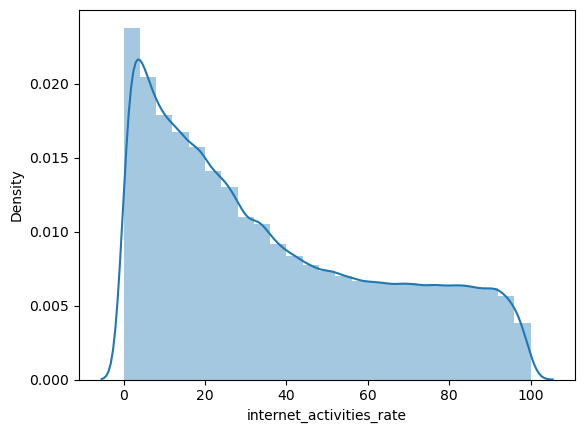

In [18]:
sns.distplot(df['internet_activities_rate'], bins=25)
plt.show() #There are no outliers

C:\Users\adrig\AppData\Local\Temp\ipykernel_41456\3017096968.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['internet_access_rate'], bins=25)


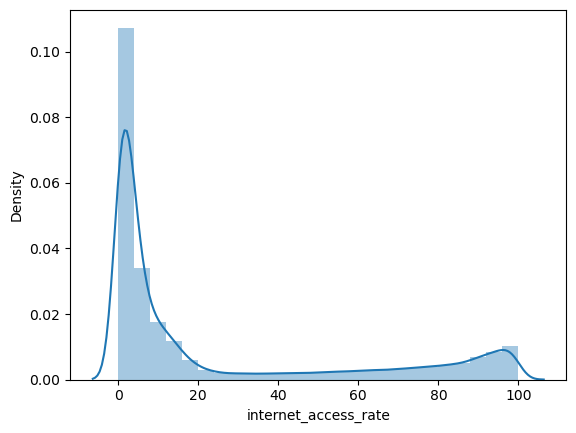

In [19]:
sns.distplot(df['internet_access_rate'], bins=25)
plt.show() #There are no outliers

# 4. Regression Analysis: GDP vs E-Commerce Activities 

## 4.1 Data Prep for Regression Analysis

In [84]:
# Create a subset filtering the information to use for the regression analysis
age_groups = ['Individuals, 16 to 24 years old', 
    'Individuals, 25 to 34 years old', 
    'Individuals, 35 to 44 years old',
    'Individuals, 45 to 54 years old',
    'Individuals, 55 to 64 years old',
    'Individuals, 65 to 74 years old',
    'Individuals, 75 years old or more']

df_age_subset = df_clean[(df_clean['demographic_group'].isin(age_groups)) & (df_clean['activity_group'] == 'E-commerce and Services')]

In [85]:
df_age_subset.head()

,freq_internet_access,demographic_group,country,year,internet_access_rate,internet_activities,internet_activities_rate,purchasing_power_gdp,activity_group
229935,daily,"Individuals, 16 to 24 years old",Albania,2018,83.14,Internet banking,1.82,9300.0,E-commerce and Services
229940,daily,"Individuals, 16 to 24 years old",Albania,2018,83.14,selling goods or services,2.25,9300.0,E-commerce and Services
229943,daily,"Individuals, 16 to 24 years old",Albania,2019,89.63,Internet banking,2.17,9600.0,E-commerce and Services
229951,daily,"Individuals, 16 to 24 years old",Albania,2019,89.63,selling goods or services,1.03,9600.0,E-commerce and Services
229955,daily,"Individuals, 16 to 24 years old",Albania,2020,90.89,Internet banking,2.37,9300.0,E-commerce and Services


In [86]:
df_age_subset.shape

(41950, 9)

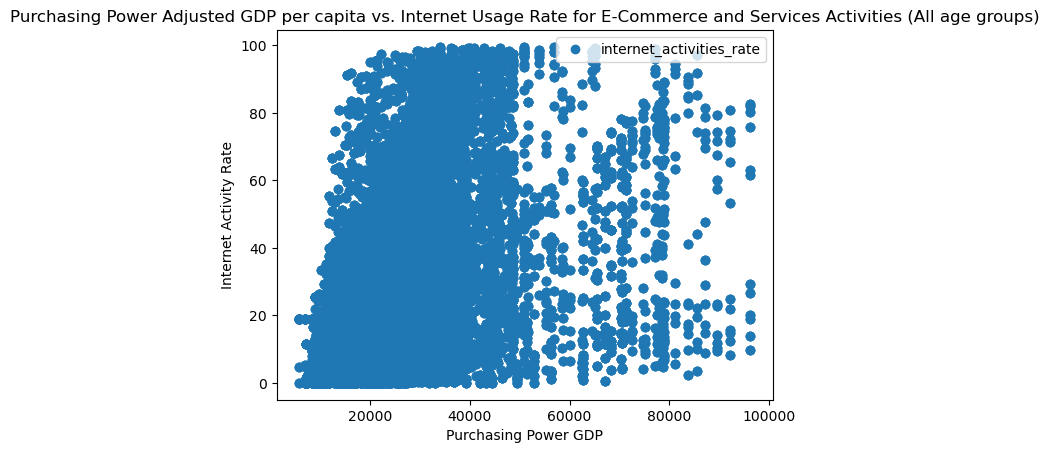

In [87]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_age_subset.plot(x='purchasing_power_gdp', y='internet_activities_rate', style='o')
plt.title('Purchasing Power Adjusted GDP per capita vs. Internet Usage Rate for E-Commerce and Services Activities (All age groups)')
plt.xlabel('Purchasing Power GDP')
plt.ylabel('Internet Activity Rate')
plt.show()

In [88]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_age_subset['purchasing_power_gdp'].values.reshape(-1,1)
y = df_age_subset['internet_activities_rate'].values.reshape(-1,1)

In [89]:
X

array([[ 9300.],
       [ 9300.],
       [ 9600.],
       ...,
       [28300.],
       [28300.],
       [28300.]])

In [90]:
y

array([[1.82],
       [2.25],
       [2.17],
       ...,
       [6.74],
       [9.25],
       [2.24]])

In [91]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4.2. Regression Analysis

In [92]:
# Create a regression object

regression = LinearRegression()

In [93]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [94]:
# Predict the values for y using X

y_predicted = regression.predict(X_test)

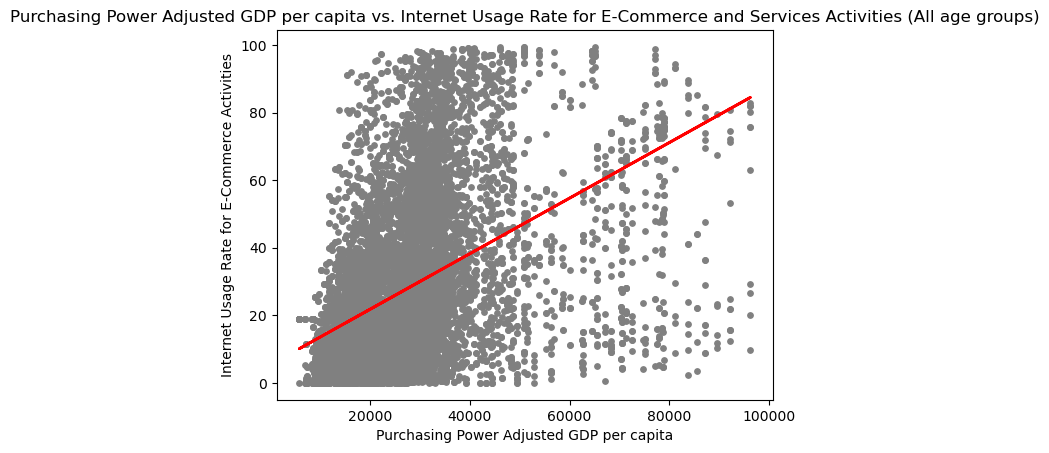

In [95]:
# Create a plot than shows the regression line from the model on the test set. 

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=2)
plot_test.title('Purchasing Power Adjusted GDP per capita vs. Internet Usage Rate for E-Commerce and Services Activities (All age groups)')
plot_test.xlabel('Purchasing Power Adjusted GDP per capita')
plot_test.ylabel('Internet Usage Rate for E-Commerce Activities')
plot_test.show()

In [96]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [97]:
# Print the model summary statistics

print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[0.0008233]]
Mean squared error:  529.4210187173916
R2 score:  0.18938969107599213


### Comments on results:
The model is definetly a poor fit. The regression line does not follow the cloud of data, which is widely spread and shows no clear pattern.
The summary statistics confirms this obsercation: 
- Thslope is very close to 0, which means that increases in the GDP have almost no effect on the internet activity rate.
- The MSE is too large, indicating a big difference between the predicted and the actual values.
- The R2 score of 0.18 means that only 14% of the data variance is explained by the model. 

In [98]:
# Create a dataframe comparing the actual and predicted valeues of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,12.48,18.044997
1,0.90,24.960746
2,5.50,22.820157
3,2.84,14.175471
4,16.39,21.338211
5,21.67,17.633345
6,62.55,31.300182
7,33.67,22.326175
8,11.46,15.245765
9,4.28,16.810042


### Comments on results:
In the correlation analysis, the value was high, but the data had been averaged for each country, this might explain why the regression analysis is not working as expected.  
The next step will be to explore the individual activities within the E-commerce and Services activity group to identify if any specific activity has a stronger relationship with GDP. The goal is to select the one with the greatest potential for a meaningful regression analysis.   

# 5. Relationship Exploration

I will create scatterplots to visualize the next activities compared with the GDP:
- Internet banking
- Selling goods and services
- Travel and accommodation services
- Managing a payment account to (potentially) pay for goods or services purchased over the internet

In [99]:
# Create a subset filtering the information to use for the regression analysis
df_banking_subset = df_clean[(df_clean['demographic_group'].isin(age_groups)) & (df_clean['internet_activities'] == 'Internet banking')]

In [100]:
df_banking_subset.head()

,freq_internet_access,demographic_group,country,year,internet_access_rate,internet_activities,internet_activities_rate,purchasing_power_gdp,activity_group
229935,daily,"Individuals, 16 to 24 years old",Albania,2018,83.14,Internet banking,1.82,9300.0,E-commerce and Services
229943,daily,"Individuals, 16 to 24 years old",Albania,2019,89.63,Internet banking,2.17,9600.0,E-commerce and Services
229955,daily,"Individuals, 16 to 24 years old",Albania,2020,90.89,Internet banking,2.37,9300.0,E-commerce and Services
229966,daily,"Individuals, 16 to 24 years old",Albania,2021,93.37,Internet banking,2.94,10300.0,E-commerce and Services
229976,daily,"Individuals, 16 to 24 years old",Albania,2022,96.24,Internet banking,12.27,12200.0,E-commerce and Services


In [113]:
df_banking_subset.shape

(15397, 9)

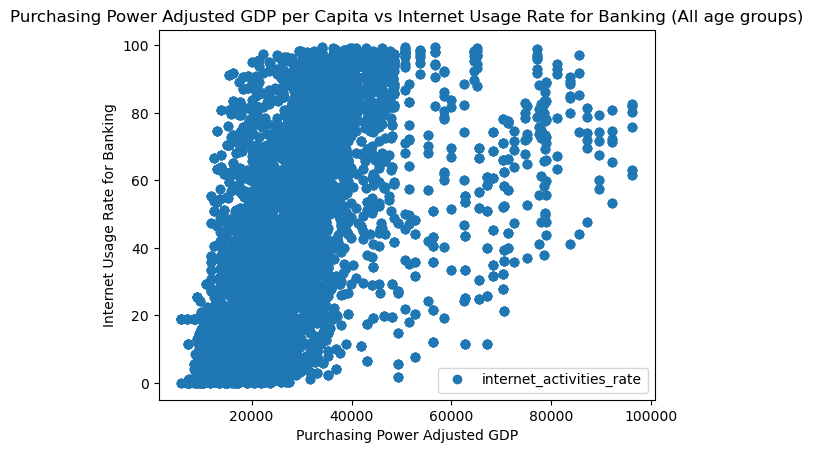

In [114]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_banking_subset.plot(x = 'purchasing_power_gdp', y='internet_activities_rate',style='o') 
plt.title('Purchasing Power Adjusted GDP per Capita vs Internet Usage Rate for Banking (All age groups)')  
plt.xlabel('Purchasing Power Adjusted GDP')  
plt.ylabel('Internet Usage Rate for Banking')  
plt.show()

There is no clear pattern. The values are clustered in the left side of the graph, but as the GDP increases, the datapoint are more scattered. 

In [115]:
# Create a subset filtering the information to use for the regression analysis
df_goods_subset = df_clean[(df_clean['demographic_group'].isin(age_groups)) & (df_clean['internet_activities'] == 'selling goods or services')]

In [116]:
df_goods_subset.head()

,freq_internet_access,demographic_group,country,year,internet_access_rate,internet_activities,internet_activities_rate,purchasing_power_gdp,activity_group
229940,daily,"Individuals, 16 to 24 years old",Albania,2018,83.14,selling goods or services,2.25,9300.0,E-commerce and Services
229951,daily,"Individuals, 16 to 24 years old",Albania,2019,89.63,selling goods or services,1.03,9600.0,E-commerce and Services
229962,daily,"Individuals, 16 to 24 years old",Albania,2020,90.89,selling goods or services,0.81,9300.0,E-commerce and Services
229973,daily,"Individuals, 16 to 24 years old",Albania,2021,93.37,selling goods or services,1.53,10300.0,E-commerce and Services
229983,daily,"Individuals, 16 to 24 years old",Albania,2022,96.24,selling goods or services,6.96,12200.0,E-commerce and Services


In [117]:
df_goods_subset.shape

(15099, 9)

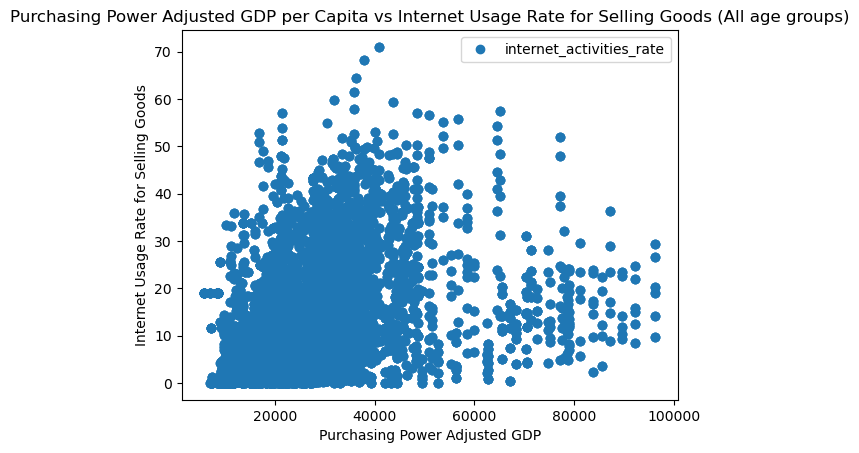

In [118]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_goods_subset.plot(x = 'purchasing_power_gdp', y='internet_activities_rate',style='o') 
plt.title('Purchasing Power Adjusted GDP per Capita vs Internet Usage Rate for Selling Goods (All age groups)')  
plt.xlabel('Purchasing Power Adjusted GDP')  
plt.ylabel('Internet Usage Rate for Selling Goods')  
plt.show()

There is also no clear trend in this scatterplot. The data is concentrated at the lower left end of the graph, but there are also a lot of scatter datapoints. 

In [119]:
# Create a subset filtering the information to use for the regression analysis
df_travel_subset = df_clean[(df_clean['demographic_group'].isin(age_groups)) & (df_clean['internet_activities'] == 'travel and accommodation services')]

In [120]:
df_travel_subset.head()

,freq_internet_access,demographic_group,country,year,internet_access_rate,internet_activities,internet_activities_rate,purchasing_power_gdp,activity_group
230009,daily,"Individuals, 16 to 24 years old",Austria,2003,30.15,travel and accommodation services,16.09,26300.0,E-commerce and Services
230017,daily,"Individuals, 16 to 24 years old",Austria,2004,41.37,travel and accommodation services,12.19,27400.0,E-commerce and Services
230026,daily,"Individuals, 16 to 24 years old",Austria,2005,49.36,travel and accommodation services,22.34,28500.0,E-commerce and Services
230036,daily,"Individuals, 16 to 24 years old",Austria,2006,59.52,travel and accommodation services,25.29,29700.0,E-commerce and Services
230046,daily,"Individuals, 16 to 24 years old",Austria,2007,61.14,travel and accommodation services,27.01,30900.0,E-commerce and Services


In [121]:
df_travel_subset.shape

(10881, 9)

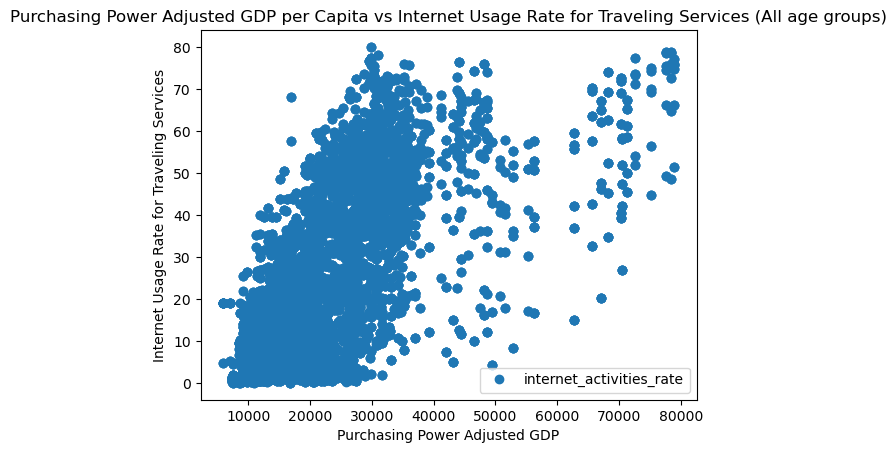

In [122]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_travel_subset.plot(x = 'purchasing_power_gdp', y='internet_activities_rate',style='o') 
plt.title('Purchasing Power Adjusted GDP per Capita vs Internet Usage Rate for Traveling Services (All age groups)')  
plt.xlabel('Purchasing Power Adjusted GDP')  
plt.ylabel('Internet Usage Rate for Traveling Services')  
plt.show()

This activity shows an upward trend compared with the others. This makes Traveling and accomodation services a more promising candidate for the regression analysis. 

In [123]:
# Create a subset filtering the information to use for the regression analysis
df_payment_subset = df_clean[(df_clean['demographic_group'].isin(age_groups)) & (df_clean['internet_activities'] == 'managing a payment account to (potentially) pay for goods or services purchased over the internet')]

In [124]:
df_payment_subset.head()

,freq_internet_access,demographic_group,country,year,internet_access_rate,internet_activities,internet_activities_rate,purchasing_power_gdp,activity_group
230166,daily,"Individuals, 16 to 24 years old",Austria,2016,93.33,managing a payment account to (potentially) pa...,24.86,36400.0,E-commerce and Services
230454,daily,"Individuals, 16 to 24 years old",Belgium,2016,93.35,managing a payment account to (potentially) pa...,35.04,33600.0,E-commerce and Services
230686,daily,"Individuals, 16 to 24 years old",Bulgaria,2016,84.72,managing a payment account to (potentially) pa...,3.06,14400.0,E-commerce and Services
230980,daily,"Individuals, 16 to 24 years old",Cyprus,2016,96.37,managing a payment account to (potentially) pa...,18.13,24500.0,E-commerce and Services
231225,daily,"Individuals, 16 to 24 years old",Czechia,2016,95.01,managing a payment account to (potentially) pa...,3.18,25400.0,E-commerce and Services


In [125]:
df_payment_subset.shape

(573, 9)

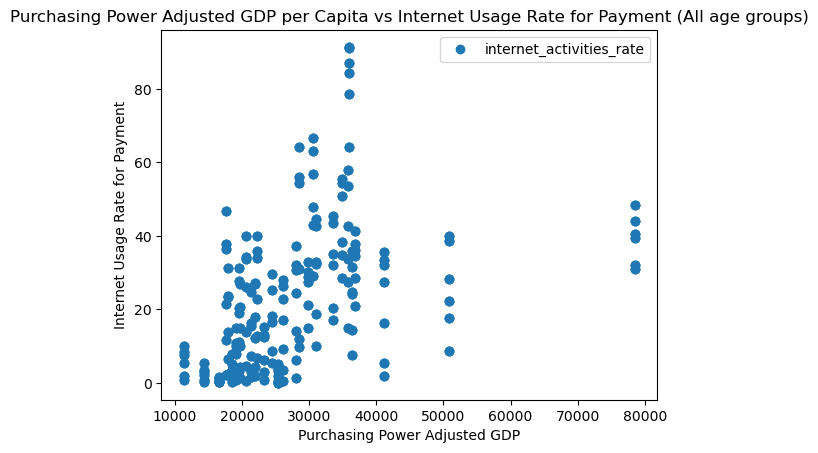

In [126]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_payment_subset.plot(x = 'purchasing_power_gdp', y='internet_activities_rate',style='o') 
plt.title('Purchasing Power Adjusted GDP per Capita vs Internet Usage Rate for Payment (All age groups)')  
plt.xlabel('Purchasing Power Adjusted GDP')  
plt.ylabel('Internet Usage Rate for Payment')  
plt.show()

There is no clear trend and the data size is too small to perform a regression analysis. 

# 6. Regression Analysis: GDP vs. Travel and Accomodation Services

## 6.1 Data Prep for Regression Analysis

In [127]:
df_travel_subset.shape # The size of data is not ideal (5000 rows min), but I will still perform the regression analysis. 

(10881, 9)

In [128]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_2 = df_travel_subset['purchasing_power_gdp'].values.reshape(-1,1)
y_2 = df_travel_subset['internet_activities_rate'].values.reshape(-1,1)

In [129]:
print (X_2.shape)
print (y_2.shape)

(10881, 1)
(10881, 1)


In [130]:
# Split data into a training set and a test set.
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [131]:
print (X_train_2.shape)
print (y_train_2.shape)

(7616, 1)
(7616, 1)


## 6.2 Regresssion Analysis

In [132]:
# Create a regression object

regression = LinearRegression()

In [133]:
# Fit the regression object onto the training set

regression.fit(X_train_2, y_train_2)

LinearRegression()

In [134]:
# Predict the values of y using X

y_predicted_2 = regression.predict(X_test_2)

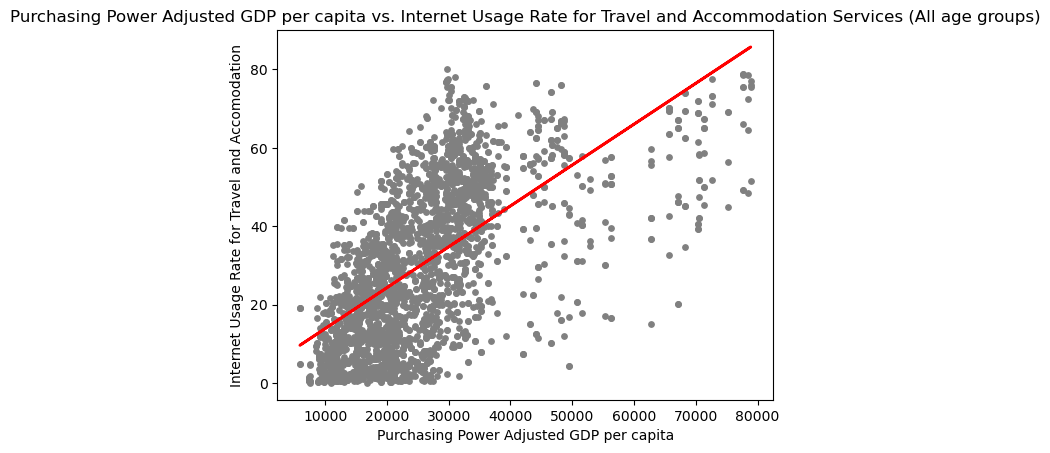

In [149]:
# Create a plot than shows the regression line from the model on the test set. 

plot_test_2 = plt
plot_test_2.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test_2.plot(X_test_2, y_predicted_2, color='red', linewidth=2)
plot_test_2.title('Purchasing Power Adjusted GDP per capita vs. Internet Usage Rate for Travel and Accommodation Services (All age groups)')
plot_test_2.xlabel('Purchasing Power Adjusted GDP per capita')
plot_test_2.ylabel('Internet Usage Rate for Travel and Accomodation')
plot_test_2.show()

In [150]:
# Create objects that contain the model summary statistics.

rmse_2 = mean_squared_error(y_test_2, y_predicted_2)
r2_2 = r2_score(y_test_2, y_predicted_2)

In [151]:
# Print the model summary statistics

print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope:  [[0.00091487]]
Mean squared error:  248.1270333963532
R2 score:  0.3833222579704568


### Comments on results:
Althoug the values are better than in the previous regression analysis. It is still a poor fit. 
- The slope is still close to 0, which means that an increase in the GDP is neither positively nor negatively related to a higher internet usage rate for travel and accommodation activities.
- The MSE value is still high, indicating that the differences between the actual and the predicted values are too large.
- The R2 score shows that only the 38% of the variance in the data can be explained by the model.

# 7. Regression Analysis GDP vs. Daily Frequency Internet Access

## 7.1 Data Prep for Regression Analysis

In [138]:
# Create a subset filtering the information to use for the regression analysis

df_freq_subset = df_clean[(df_clean['demographic_group'].isin(age_groups)) & (df_clean['freq_internet_access'] == 'daily')]

In [139]:
df_freq_subset.head()

,freq_internet_access,demographic_group,country,year,internet_access_rate,internet_activities,internet_activities_rate,purchasing_power_gdp,activity_group
229935,daily,"Individuals, 16 to 24 years old",Albania,2018,83.14,Internet banking,1.82,9300.0,E-commerce and Services
229936,daily,"Individuals, 16 to 24 years old",Albania,2018,83.14,sending/receiving e-mails,33.07,9300.0,Personal Communication
229937,daily,"Individuals, 16 to 24 years old",Albania,2018,83.14,finding information about goods and services,45.55,9300.0,Information and Research
229938,daily,"Individuals, 16 to 24 years old",Albania,2018,83.14,making an appointment with a practitioner via ...,1.83,9300.0,Health
229939,daily,"Individuals, 16 to 24 years old",Albania,2018,83.14,telephoning or video calls,80.61,9300.0,Personal Communication


In [140]:
df_freq_subset.shape

(48334, 9)

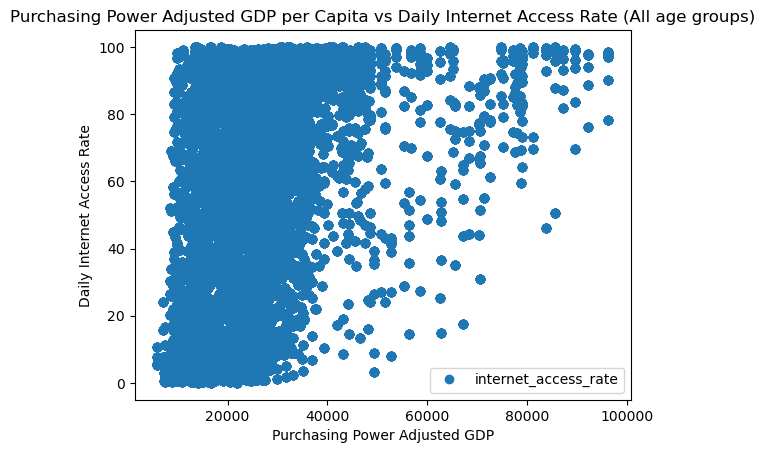

In [141]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_freq_subset.plot(x = 'purchasing_power_gdp', y='internet_access_rate',style='o') 
plt.title('Purchasing Power Adjusted GDP per Capita vs Daily Internet Access Rate (All age groups)')  
plt.xlabel('Purchasing Power Adjusted GDP')  
plt.ylabel('Daily Internet Access Rate')  
plt.show()

Although the graph shows some dispersion, there seems to be a positive trend. The countries with higher GDP shows less variation and high internet access rates. Before doing the regression analysis, I will first explore on a split of age ranges 16-44 and 45-75+ (as the geospatial analysis showed a trend within this two splits) to see if the visual correlation is better. 

In [156]:
# Create a subset filtering the information to use for the regression analysis
age_groups_young = ['Individuals, 16 to 24 years old', 
    'Individuals, 25 to 34 years old', 
    'Individuals, 35 to 44 years old']

df_freq_young_subset = df_clean[(df_clean['demographic_group'].isin(age_groups_young)) & (df_clean['freq_internet_access'] == 'daily')]

In [157]:
df_freq_young_subset.head()

,freq_internet_access,demographic_group,country,year,internet_access_rate,internet_activities,internet_activities_rate,purchasing_power_gdp,activity_group
229935,daily,"Individuals, 16 to 24 years old",Albania,2018,83.14,Internet banking,1.82,9300.0,E-commerce and Services
229936,daily,"Individuals, 16 to 24 years old",Albania,2018,83.14,sending/receiving e-mails,33.07,9300.0,Personal Communication
229937,daily,"Individuals, 16 to 24 years old",Albania,2018,83.14,finding information about goods and services,45.55,9300.0,Information and Research
229938,daily,"Individuals, 16 to 24 years old",Albania,2018,83.14,making an appointment with a practitioner via ...,1.83,9300.0,Health
229939,daily,"Individuals, 16 to 24 years old",Albania,2018,83.14,telephoning or video calls,80.61,9300.0,Personal Communication


In [158]:
df_freq_young_subset.shape

(23713, 9)

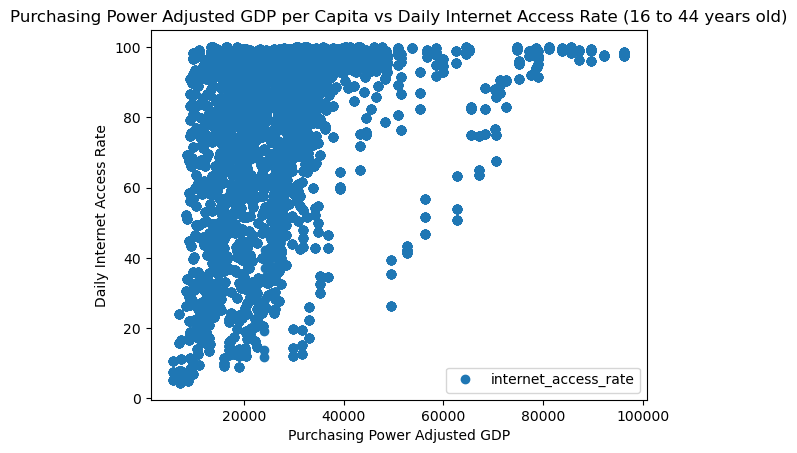

In [160]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_freq_young_subset.plot(x = 'purchasing_power_gdp', y='internet_access_rate',style='o') 
plt.title('Purchasing Power Adjusted GDP per Capita vs Daily Internet Access Rate (16 to 44 years old)')  
plt.xlabel('Purchasing Power Adjusted GDP')  
plt.ylabel('Daily Internet Access Rate')  
plt.show()

This scatterplot shows a clearer positive trend on the correlation between the GDP and the daily internet access rates. This would be a better fit for the regression analysis. 

In [161]:
# Create a subset filtering the information to use for the regression analysis
age_groups_old = ['Individuals, 45 to 54 years old', 
    'Individuals, 55 to 64 years old', 
    'Individuals, 65 to 74 years old',
    'Individuals, 75 years old or more']

df_freq_old_subset = df_clean[(df_clean['demographic_group'].isin(age_groups_old)) & (df_clean['freq_internet_access'] == 'daily')]

In [163]:
df_freq_old_subset.head()

,freq_internet_access,demographic_group,country,year,internet_access_rate,internet_activities,internet_activities_rate,purchasing_power_gdp,activity_group
276496,daily,"Individuals, 45 to 54 years old",Albania,2018,36.86,Internet banking,1.26,9300.0,E-commerce and Services
276497,daily,"Individuals, 45 to 54 years old",Albania,2018,36.86,sending/receiving e-mails,9.04,9300.0,Personal Communication
276498,daily,"Individuals, 45 to 54 years old",Albania,2018,36.86,finding information about goods and services,18.82,9300.0,Information and Research
276499,daily,"Individuals, 45 to 54 years old",Albania,2018,36.86,making an appointment with a practitioner via ...,2.32,9300.0,Health
276500,daily,"Individuals, 45 to 54 years old",Albania,2018,36.86,telephoning or video calls,43.01,9300.0,Personal Communication


In [164]:
df_freq_old_subset.shape

(24621, 9)

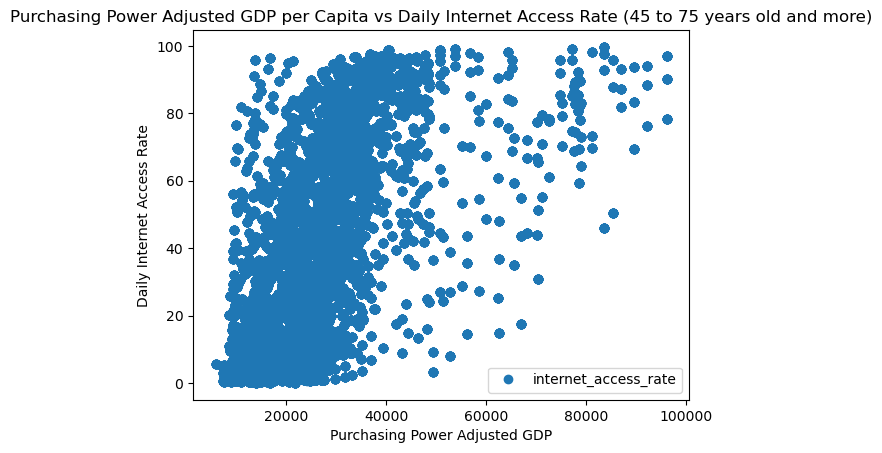

In [165]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_freq_old_subset.plot(x = 'purchasing_power_gdp', y='internet_access_rate',style='o') 
plt.title('Purchasing Power Adjusted GDP per Capita vs Daily Internet Access Rate (45 to 75 years old and more)')  
plt.xlabel('Purchasing Power Adjusted GDP')  
plt.ylabel('Daily Internet Access Rate')  
plt.show()

This scatterplot shows no clear trend. I will then  use the group age 16 to 44 for the regression analysis. 

In [166]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_3 = df_freq_young_subset['purchasing_power_gdp'].values.reshape(-1,1)
y_3 = df_freq_young_subset['internet_access_rate'].values.reshape(-1,1)

In [167]:
print(X_3.shape)
print(y_3.shape)

(23713, 1)
(23713, 1)


In [168]:
# Split data into a training and a test set.

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

In [169]:
print(X_train_3.shape)
print(y_train_3.shape)

(16599, 1)
(16599, 1)


## 7.2 Regression Analysis

In [170]:
# Create a regression object

regression = LinearRegression()

In [171]:
# Fit the regression objecto onto the training set

regression.fit(X_train_3, y_train_3)

LinearRegression()

In [172]:
# Predict the values of y using X

y_predicted_3 = regression.predict(X_test_3)

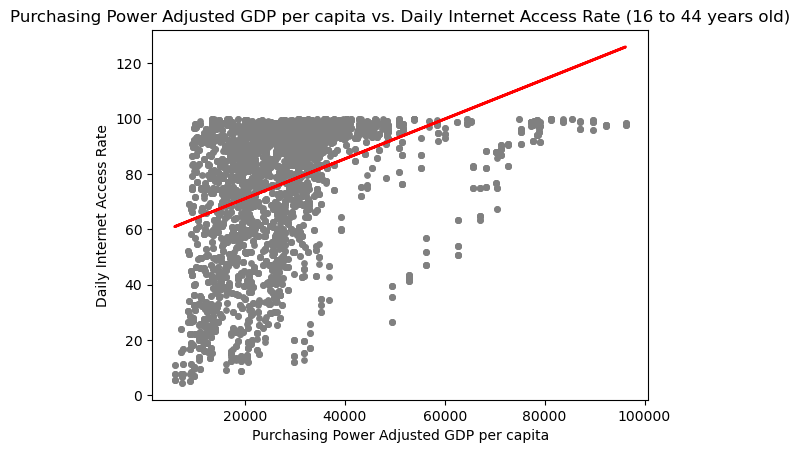

In [176]:
# Create a plot than shows the regression line from the model on the test set. 

plot_test_3 = plt
plot_test_3.scatter(X_test_3, y_test_3, color='gray', s = 15)
plot_test_3.plot(X_test_3, y_predicted_3, color='red', linewidth=2)
plot_test_3.title('Purchasing Power Adjusted GDP per capita vs. Daily Internet Access Rate (16 to 44 years old)')
plot_test_3.xlabel('Purchasing Power Adjusted GDP per capita')
plot_test_3.ylabel('Daily Internet Access Rate')
plot_test_3.show()

In [174]:
# Create objects that contain the model summary statistics

rmse_3 = mean_squared_error(y_test_3, y_predicted_3)
r2_3 = r2_score(y_test_3, y_predicted_3)

In [175]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_3)
print('R2 score: ', r2_3)

Slope: [[0.00071982]]
Mean squared error:  445.9623627814988
R2 score:  0.17302208407234665


### Comments on results:
It is a poor fit. 
- The slope is close to 0, which means that an increase in the GDP is neither positively nor negatively related to a higher daily internet access rate.
- The MSE value is very high, indicating that the differences between the actual and the predicted values are too large.
- The R2 score shows that only the 17% of the variance in the data can be explained by the model.

# 8. Conclusion

Based on the current analysis, none of the variables examined so far show a strong correlation with the adjusted GDP per capita.
This suggests that GDP alone has no influence in the internet usage behavior across different activities or demographic groups. 